# MTHM030 Numerical Coursework

In [1]:
import numpy as np
import scipy as sp
from scipy.linalg import eig
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
print('This python code is written and intended for viewing in a jupyter notebook (or equivalent)')

This python code is written and intended for viewing in a jupyter notebook (or equivalent)


## Q2

### 2a 

Domain size needs to be adjusted to suit the boundaries given by the problem.

In [3]:
y1=-3
y2=3

Number of grid points are appropriate and do not need changing for now. More grid points would give greater accuracy but is more demanding.

In [4]:
#grid points not including boundary
n=49
#ntot includes the boundary on either side of the domain
ntot=n+2 

Number of wavenumbers we are solving for is reduced to 180. Fewer total wavenumbers is less computationally intensive. As seen in a later part, wavenumbers above approximatly k=1.75 give no extra information about the stability of this particular setup. The exponential distribution of wavenumbers (also seen in a later part) mean the 173rd wavenumber corresponds to approximately k=1.75, so using 180 total wavenumvers is sufficient to test for stability, while being minimally intensive.

In [5]:
nwave=180

#set up an array of zeroes to store k values
savek=np.zeros(nwave+1)

Set up grid spacing and grid points based on the new limits.

In [6]:
#create an array of equally spaced grid points
y=np.linspace(y1,y2,ntot)
#define the distbace between grid points
dy=(y2-y1)/(ntot-1)

The basic velocity profile must be redefined to match the question. U is the x-componant of velocity, setting the parameter a=0.5.

In [7]:
#define shear flow half-width
a=0.5
#define flow profile
U=np.tanh(y/a)

Calculate the velocity second derrivative Uyy numerically (valid for any input velocity) at each grid point, and storing in an empty array. Since this is calculated numerically, there will be an error associated with later answers.

In [8]:
#set up an array to store values for Uyy
Uyy=np.zeros(ntot)
#Caculate Uyy on each grid point
for j in np.arange(1,n+1):
    Uyy[j]=(U[j+1]-2.0*U[j]+U[j-1])/(dy*dy)

Plot the profiles for U and Uyy to visualise flow and possible inflection points.

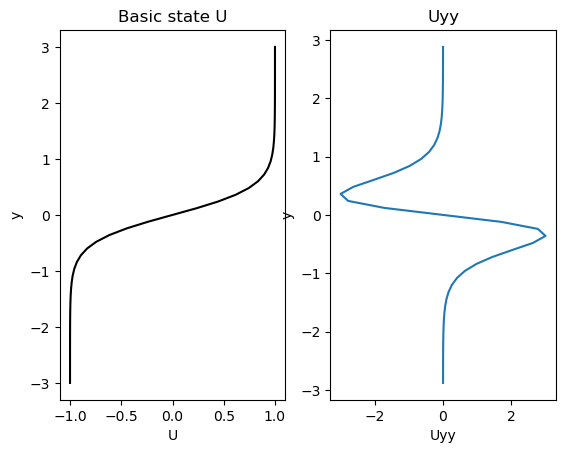

In [9]:
fig1=plt.figure(1)
plt.subplot(1, 2, 1)
plt.plot(U, y, 'k')
plt.title('Basic state U')
plt.xlabel('U')
plt.ylabel('y')
plt.subplot(1, 2, 2)
plt.plot(Uyy[1:n+1], y[1:n+1])
plt.title('Uyy')
plt.xlabel('Uyy')
plt.ylabel('y')
plt.show()

The velocity and derrivative profiles are as expected, since we are using a basic flow with a known form.

From the Uyy profile, there appears to be an inflection point around y=0, as here Uyy=0. This is just a basic visualisation, further analysis would be needed to confirm this.

The original code is sufficient for now to test for stability. It will be changed in 2b for the required further analysis.

Unaltered original code:

In [10]:
stable = 1
for iloop in np.arange(1,nwave+1):
    
    k = (2.0**0.0625)**(iloop - 160)
    
    D = np.zeros((n,n))
    for i in range(n):
        D[i,i] = -2./dy/dy - k*k
    for i in range(0, n-1):
        D[i,i+1] = 1./dy/dy
        D[i+1,i] = 1./dy/dy
    
    A = np.copy(D)

    for i in range(n):
        A[i,i] = D[i,i]*U[i+1]-Uyy[i+1]
    for i in range(0, n-1):
        A[i,i+1] *= U[i+1]
        A[i+1,i] *= U[i+2]
    
    vals, vects = eig(A, D)

    for i in range(n):
        vv = vects[:,i]
        error = np.max(np.abs(A.dot(vv)-vals[i]*D.dot(vv)))
        if error > 1.e-8:
            print ('Error in the eigenvalue problem = ',error)
            
    for j in np.arange(0,len(vals)):
        c =vals[j];
        if np.imag(c) > 0.0:
            stable = 0
        growth = k*np.imag(c)
        
    savek[iloop] = k
    
if (stable):
    print('No unstable mode found')
else:
    print('Unstable')

Unstable


With the domain parameters and flow profile adjusted to fit the question, the flow is found to be unstable, as at least one eigenvalue has an imaginary componant. This fits with the theory from Q1, where it was concluded that an unstable flow was plausable.

With the range of k values reduced, the error from the eigenvalue problem for each associated wavenumber is very low (all below 10^-8), indicating the setup is a very good approximation to the true solution.

Figure 2 shows the distribution of k values, due to this exponential distribution. This illustrates areas of relativly high resolution (very low wavenumbers), and lower resolution (above k=0.5, where there only exist a few gridpoints for small increases to k).

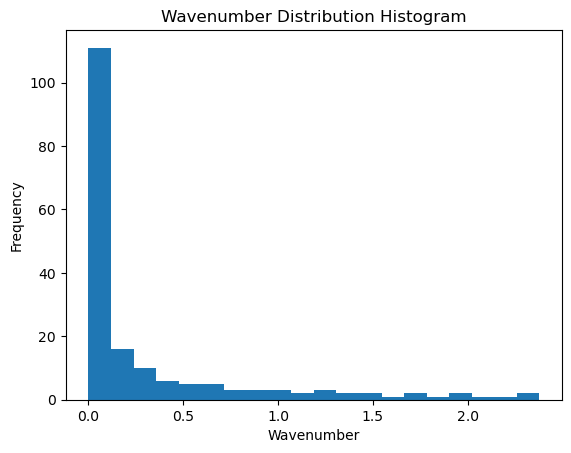

In [11]:
fig2=plt.figure(2)
plt.hist(savek,20)
plt.title('Wavenumber Distribution Histogram')
plt.xlabel('Wavenumber')
plt.ylabel('Frequency')
plt.show()

### 2b

The original code needs adjusting to fit the needs of this problem.

The maximum growth rate for each eigenmode needs to be stored to be used for analysis, hence the addition of a growth array which has a single maximum value stored within for each wavenumber.

The maximum wavenumber for which the growth rate is non-zero needs to be read from a graph. With the original code, this graph becomes highly innacurate for k>1.5 (The expected cut-off wavenumber from the graph is clearly above 1.5), as due to the original logarithmic distribution of k-values `k=(2.0**0.0625)**(iloop-160)`, the spacing between k-vlaues begins to dramatically increase around k=0.5 (figure 2). To rectify this and accurately read off a value from the graph, the spacing between k-values between k=0.5 and k=3 (where the cut-off wavenumber appears to be) needs to decrease. This could be done by changing the exponential distribution of k values, to possibly a different exponential, or to an even ordered polynomial centred around k=2. Through trails of this, a suitable replacement was not found that increased the accuracy in the concerned region without also being increadibly computationally intensive. 

Another possible solution was to increase the resolution of the existing grid. This could be done globally, by increasing the initial n grid points, but this would hake the entire notebook extremely slow, so for this particular question, a 'resolution multiplier' was introduced. This has been used to decrease the step size for the for loop which defines the wavenumber k. Instead of being defined for each integer wavenumber, k is defined between 1 and nwave in steps of 1/res_multiplier. This decreases the distance between k-values and hence increases the number of k-values by a factor of res_multiplier, increasing the resolution over all wavenumbers without adjusting the distribution of k-values. This method increases the computation time, especially for much higer resolutions, so a compromise is made such that the observed value is accureate enough without too much strain. This change to non-integer steps requires some functions, such as the storing of k and growth values into arrays, to be adjusted.

Here is the adjusted code:

In [12]:
#Create a flag to show stability, 1=stable, 0=unstable.
stable=1

#Introduce a resolution multiplier to decrease the spacing between k-values, res_multiplier=1 indicates integer spacing.
#This method preserves the range of values k spans and the exponential distribution, but increases the number of k values between these values.
res_multiplier=10

#Create a zeros array to store a growth value for each wavenumber.
#The size of this array must be changed according to the number of k-values, which is dependant on the res_multiplier.
max_growth=np.zeros(res_multiplier*(nwave+1))

#The zeroes array to store k values needs to change size depending on the number of k-values
savek=np.zeros(res_multiplier*(nwave+1))

#loop over all the wavenumbers, with a smaller spacing for higher res_multiplier.
for iloop in np.arange(1,nwave+1,1/res_multiplier):
    
    #Define the wavenumber for each loop, based on a logarithmic scale with higer resolution for lower wavenumbers.
    k=(2.0**0.0625)**(iloop-160)
    
    # Set up matrix representation of Uyy
    # This calculates the second derivative at interior points only, assuming that the boundary values of the field are zero
    
    # Create an empty nxn matrix to solve the generalised eigenvalue equation.
    D = np.zeros((n,n))
    # The second order central difference equations can be written in a tri-diagonal matrix.
    # Define values for diagonals.
    for i in range(n):
        D[i,i]=-2.0/dy/dy-k**2
    # Define values for upper and lower diagonals.
    for i in range(0, n-1):
        D[i,i+1]=1.0/dy/dy
        D[i+1,i]=1.0/dy/dy
    # These equations impose boundary conditions.
    
    # Create a copy of the matrix calculated above
    A=np.copy(D)
    # Get rid of terms that involve eigenvalue c
    for i in range(n):
        A[i,i]=D[i,i]*U[i+1]-Uyy[i+1]
    for i in range(0, n-1):
        A[i,i+1]*=U[i+1]
        A[i+1,i]*=U[i+2]
    
    # Rayleigh's stability equation has now become the generalized eigenvalue problem A*phi=c*D*phi, c=eigenvalue

    # Solve the generalized eigenvalue problem
    vals, vects = eig(A, D)
    # This gives array of eigenvalues and a matrix of eigenvectors

    # Now check if it has worked and calculate the error
    
    #create an empty list to store error values in for each wavenumber
    errors=[]
    # Search through all n solutions
    for i in range(n):
        # Calculate eigenvectors
        vv=vects[:,i]
        # There will be error associated with solving the generalised eigenvalue problem since this is a numerical problem.
        # If this error is large, the solution is likely incorrect
        error=np.max(np.abs(A.dot(vv)-vals[i]*D.dot(vv)))
        # Show the error to show accuracy of solution
        # Unlike the originl code, the errors will be placed into a list to be assessed easier.
        errors.append(error)

    # Check for stability
    
    # Create an empty array to store the growth for each eigenvalue
    growth=[]
    # Check through all eigenvalues
    for j in np.arange(0,len(vals)):
        #set c as the eigenvalues from the array
        c=vals[j];
        #if stable Im(c) = 0, nothong changes
        #if unstable for any of the grid points, Im(c) != 0, set the flag to be 0 (unstable)
        if np.imag(c) > 0.0:
            stable = 0
        #calculate the growth (Im(kc)) and store values in the array
        growth.append(k*np.imag(c))
    
    # add the maximum growth value (from all eigenvalues) to the max_growth array for each wavenumber
    max_growth[int(iloop*res_multiplier)]=np.max(np.abs(growth))
    
    # store the wavenumber for this loop to the array
    savek[int(iloop*res_multiplier)]=k

#Print stability
if (stable):
    print('No unstable mode found')
else:
    print('Unstable')
    
#Print the maximum error
print('The highest error in the eigenvalue problem is ',max(errors))

Unstable
The highest error in the eigenvalue problem is  1.7386092565629951e-13


The adjusted code (rightly) also predicts instability. The extremely small maximum error gives a great deal of confidence that this is a correct conclusion.

The distribution of k-values with the higher resolution is shown in figure 3. Near the cut-off wavenumber, there now exists around 10-20 grid points for every 0.12 increase to k, opposed to the 2-3 grid points for the base resolution. This means the cut-off wavenumber can be assertained with a much higher degree of confidence.

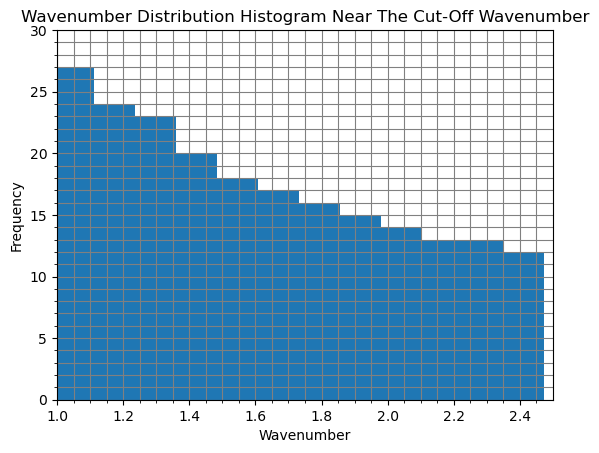

In [13]:
fig3=plt.figure(3)
plt.hist(savek,20)
plt.title('Wavenumber Distribution Histogram Near The Cut-Off Wavenumber')
plt.xlabel('Wavenumber')
plt.ylabel('Frequency')
plt.xlim(1,2.5)
plt.ylim(0,30)
plt.grid(which='both',color='gray')
plt.minorticks_on()
plt.show()

### 2c

To clearly visualise the cut-off wavenumber, and max growth rate and associated wavenumber, coloured lines have been added to the plot. The coloured lines are centered on the value in the savek array with the highest and lowest (non-zero) corresponding growth rate. The wavenumber resolution is high enough such that this value is a percise representation of the value which should be read from the graph. These values are estimates from a finite grid based off a numerical calculations, so are not exact, hence values are rounded to the resolution of the gridlines.

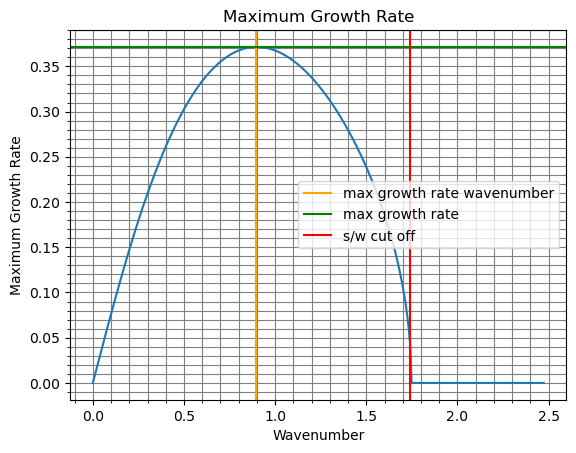

The maximum growth rate is approximately  0.37 with corresponding wavenumber k = 0.9
The short-wave cut off wavenumber is approximately k = 1.7


In [14]:
#To add a line for the minimum non-zero growth, a list for mingrowth is created, containing the non-zero max_growth values.
mingrowth=[]
for i in range (len(max_growth)):
    if (max_growth[i])!=0.0:
        mingrowth.append(max_growth[i])

#Past the short-wave cut off wavenumber, the maximum growth rate is zero for all wavenumbers, so the nwave from setup was reduced to reduce computation..
fig4=plt.figure(4)
plt.plot(savek,max_growth)
plt.title('Maximum Growth Rate')
plt.xlabel('Wavenumber')
plt.ylabel('Maximum Growth Rate')
plt.grid(which='both',color='gray')
plt.minorticks_on()
#Add a vertical line centered on the k value corresponding to the maximum max_growth
plt.axvline(x=savek[np.argmax(max_growth)],color='orange',label='max growth rate wavenumber')
#add a horizontal line centered on the maximum max_growth
plt.axhline(y=max(max_growth),color='green',label='max growth rate')
#add a vertical line centered on the k value with the minimum non-zero max_growth. 
#this value must be greater than the wavenumber for the maximum max_growth.
#the index tool has been used to select the corresponding k value.
plt.axvline(x=savek[mingrowth.index(min(mingrowth[np.argmax(max_growth):]))+res_multiplier],color='red',label='s/w cut off')
plt.legend()
plt.show()

print('The maximum growth rate is approximately ',round(max(max_growth),2),'with corresponding wavenumber k ='
      ,round(savek[np.argmax(max_growth)],1))
print('The short-wave cut off wavenumber is approximately k =',
      round(savek[mingrowth.index(min(mingrowth[np.argmax(max_growth):]))+res_multiplier],1))

### 2d

The eigenvectors for the streamfunction are the vectors stored in vects, where vects[i]=psi-hat_i. The streamfunction itself is the product of the eigenvector and exp(ik(x-ct)).

### 2e

To assess how the rate of convergence changes with a higher resolution, a loop over the resolution was created and the error calculated for each resolution. A single unstable fixed wavenumber k=1 was chosen for simplicity. From 2b it can be shown k=1 is unstable for n=49. To ensure this remains true for different resolutions, a test for instability was included that informs when the flow is stable.

In [15]:
#create empty lists to store values
#growth values are not necessary here, have been removed.
max_error=[]
#set parameters. These parameters are redinined here for ease and reliability.
k=1
a=0.5
stable=1
nwave=180
max_resolution=150
domain_size=3
y1=-domain_size
y2=domain_size

#loop over varying number of grid points n
#Only one k value, so the loop over k is removed.
for n in range(1,max_resolution):

    #set n-based parameters
    ntot=n+2
    y=np.linspace(y1,y2,ntot)
    U=np.tanh(y/a)
    Uyy=np.zeros(ntot)
    dy=(y2-y1)/(ntot-1)
    
    #repeat test for stability. This must be repeated fully since the number of grid spaces n effects outcome.

    for j in np.arange(1,n+1):
        Uyy[j] = (U[j+1] - 2.*U[j] + U[j-1])/(dy*dy)

    D = np.zeros((n,n))

    for i in range(n):
        D[i,i] = -2./dy/dy - k*k
    for i in range(0, n-1):
        D[i,i+1] = 1./dy/dy
        D[i+1,i] = 1./dy/dy

    A = np.copy(D)

    for i in range(n):
        A[i,i] = D[i,i]*U[i+1]-Uyy[i+1]
    for i in range(0, n-1):
        A[i,i+1] *= U[i+1]
        A[i+1,i] *= U[i+2]

    vals, vects = eig(A, D)

    for j in np.arange(0,len(vals)):
        c = vals[j]
        if np.imag(c) > 0.0:
            stable = 0
    
    #calculate the errors for each eigenvalue
    errors=[]
    for i in range(n):
        vv = vects[:,i]
        error = np.max(np.abs(A.dot(vv)-vals[i]*D.dot(vv)))
        errors.append(error)
    #save the maximum error for each resolution.
    max_error.append(max(errors))

if (stable): print('WARNING: k =',k,'IS SOMETIMES STABLE')

The maximum error for each resolution has been stored. The maximum error is an indicator of the reliability of the approximation. If the maximum error is very low, then the approximation is good everywhere. Since only the maximum error is stored, when plotted, fluctuations will be observed, but the general trend of the error with increased resolution will be visible.

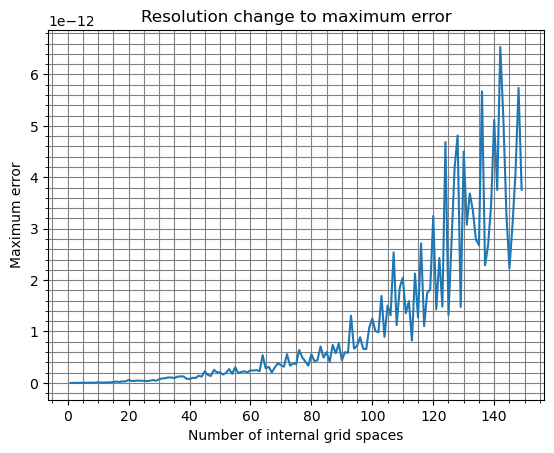

In [16]:
fig5=plt.figure(5)
plt.plot(np.arange(1,max_resolution),max_error)
plt.title('Resolution change to maximum error')
plt.xlabel('Number of internal grid spaces')
plt.ylabel('Maximum error')
plt.grid(which='both',color='gray')
plt.minorticks_on()
plt.show()

When the resolution of the grid increases, the average maximum error associated increases quadratically (fluctuations are due to only the maximum error being plotted). This is a second order convergence to zero error with fewer grid points. This is expected, as this is the error associated with solving the generalised eigenvalue equation, which involves using nxn matrices calculated by the code. The matrices contain approximated fluid equations, so inherantly have some error. Since the matrices are nxn, the error will increase as n increases by n**2, as seen in figure 4.

## Q3i

To assess the change in growth rate for the most unstable mode and short wave cut-off for increasing domain size, a loop over the domain size was created. The most unstable mode is the mode with the highest maximum growth rate, so this value was stored as the domain increased, and plotted against the domain size.

In [17]:
#set parameters.
#keep the number of grid points at the standard 49. As seen in 2d, this has a low enough error but decent resolution
n=49 
ntot=n+2
#It was found that as the domain size increased, the cut-off wavelength decreased.
#This means that even at its highest, the 180th wavenumber was high enough such that stability can be assessed.
#having a dynamically changing wavenumber to continuously decrease the computational demand would minimise compuations needed, but keeping a fixed 180 wavenumbers is sufficient.
nwave=180
a=0.5
#set the maximum half domain size, where y varies between +/-domain_size 
domain_size=50

#create empty arrays to store values.
Uyy = np.zeros(ntot)
#max_max_growth stores the highest max_growth value for each domain size.
max_max_growth=np.zeros(domain_size)
#max_max_growth stores the wavenumber associated with the highest max_growth value for each domain size.
max_max_k=np.zeros(domain_size)
#max_max_growth stores the cut-off wavenumber for each domain size.
cutoff_k=np.zeros(domain_size)

#loop over various domain sizes
for domain in range(1,domain_size):
    #set domain size dependent parameters
    #change the domain size each loop
    y1=-domain
    y2=domain
    stable=1
    dy=(y2-y1)/(ntot-1)
    y=np.linspace(y1,y2,ntot)
    U=np.tanh(y/a)
    
    #repeat stability test and calculation of growth from previous questions
    
    for j in np.arange(1,n+1):
        Uyy[j] = (U[j+1] - 2.*U[j] + U[j-1])/(dy*dy)
    
    savek = np.zeros(nwave+1)
    max_growth=np.zeros(nwave+1)
    
    #loop over all wavenumbers
    for iloop in np.arange(1,nwave+1):
        k = (2.0**0.0625)**(iloop - 160)
        savek[iloop] = k

        D = np.zeros((n,n))

        for i in range(n):
            D[i,i] = -2./dy/dy - k*k
        for i in range(0, n-1):
            D[i,i+1] = 1./dy/dy
            D[i+1,i] = 1./dy/dy

        A = np.copy(D)

        for i in range(n):
            A[i,i] = D[i,i]*U[i+1]-Uyy[i+1]
        for i in range(0, n-1):
            A[i,i+1] *= U[i+1]
            A[i+1,i] *= U[i+2]

        vals, vects = eig(A, D)

        errors=[]
        for i in range(n):
            vv = vects[:,i]
            error = np.max(np.abs(A.dot(vv)-vals[i]*D.dot(vv)))
            errors.append(error)

        growth=[]
        for j in np.arange(0,len(vals)):
            c =vals[j];
            if np.imag(c) > 0.0:
                stable = 0
            growth.append(k*np.imag(c))
        max_growth[iloop]=np.max(np.abs(growth))

    #give a warning message if the flow is ever stable
    if (stable):
        print('STABLE MODE DETECTED: domain_size =',domain)

    #create a list with the non-zero max_growth values above the maximum, in order to calculate the cut off wavelength
    mingrowth=[]
    for i in range (len(max_growth)):
        if (max_growth[i])!=0.0:
            mingrowth.append(max_growth[i])
    mingrowth=mingrowth[np.argmax(mingrowth):]
    
    #store the maximum max_growth value for each domain size
    max_max_growth[domain]=max(max_growth)
    #store the corresponding wavelength for each domain size
    max_max_k[domain]=savek[np.argmax(max_growth)]
    
    #calculate and store the cut off wavelength for each domain size
    #this is the wavelength in the savek list with the index equal to the cut off wavelength
    max_growth=max_growth.tolist()
    cutoff_k[domain]=savek[1+max_growth.index(max(max_growth))+mingrowth.index(min(mingrowth))+1]

The maximum growth rate for the most unstable mode, corresponding wavelength, and the cut off wavelength are plotted against the size of the domain.

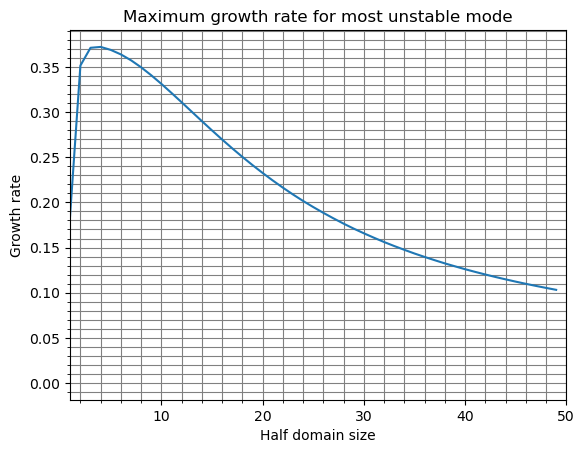

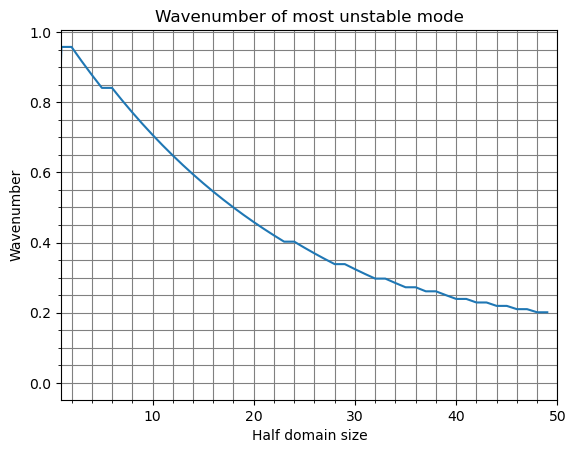

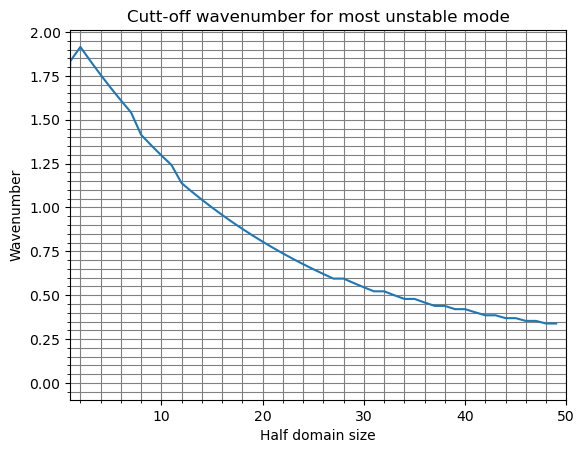

In [18]:
fig6=plt.figure(6)
plt.plot(np.arange(0,domain_size),max_max_growth)
plt.title('Maximum growth rate for most unstable mode')
plt.xlabel('Half domain size')
plt.ylabel('Growth rate')
plt.grid(which='both',color='gray')
plt.xlim(1,domain_size)
plt.minorticks_on()
plt.show()

fig7=plt.figure(7)
plt.plot(np.arange(0,domain_size),max_max_k)
plt.title('Wavenumber of most unstable mode')
plt.xlabel('Half domain size')
plt.ylabel('Wavenumber')
plt.grid(which='both',color='gray')
plt.xlim(1,domain_size)
plt.minorticks_on()
plt.show()

fig8=plt.figure(8)
plt.plot(np.arange(0,domain_size),cutoff_k)
plt.title('Cutt-off wavenumber for most unstable mode')
plt.xlabel('Half domain size')
plt.ylabel('Wavenumber')
plt.grid(which='both',color='gray')
plt.xlim(1,domain_size)
plt.minorticks_on()
plt.show()

All of these variables converge towards zero, after peaking around the half domain size of 3 (the original question parameters). They all converge asymptotically, this means that increasing the domain sufficiently (to say y=+/-50) gives an analogue of the infinite domain, as continuously increasing the domain size gives diminishing returns.

This result is expected. As the domain approaches infinity, the wavenumbers for which istability occurs reduces towards zero, as there is no boundary to create instability. The most unstable mode and it's associated wavelength also approaches zero, as the flow gets more and more stable with an infinite domain. The shear flow in question is of the for tanh(2y), which approaches a constant value +/-1 as y approaches +/-1, hence stability is more likely with a larger y domain.

### 3a

A simple piecewise function will be constructed to approximate the shear flow.

Firstly, the parameters needed are defined.

In [19]:
#parameters needed for smooth and piecewise flow
#more grid spaces imporve the plots created
n=49
ntot=n+2
nwave=320
a=0.5
domain_size=3
y1=-domain_size
y2=domain_size

y=np.linspace(y1,y2,ntot)

The smooth flow is defined and plotted here, so a comparison can be made for the piecewise flow.

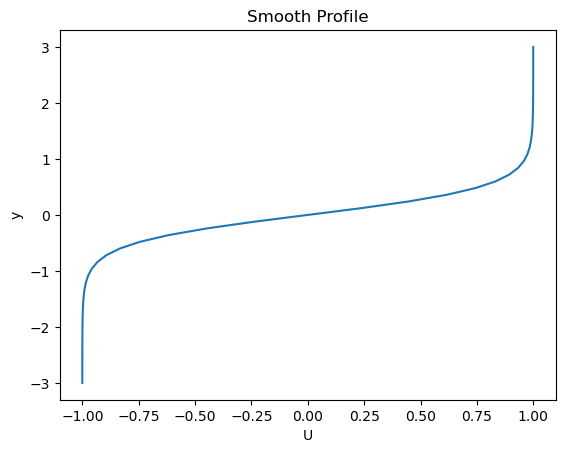

In [20]:
Uyy=np.zeros(ntot)
dy=(y2-y1)/(ntot-1)
U=np.tanh(y/a)

for j in np.arange(1,n+1):
    Uyy[j]=(U[j+1]-2.0*U[j]+U[j-1])/(dy*dy)

fig9=plt.figure(9)
plt.plot(U,y)
plt.title('Smooth Profile')
plt.xlabel('U')
plt.ylabel('y')
plt.show()

The shape of this profile suggests a simple piecewise function U=(1 for y>=1),(y for 1>y>=-1),(-1 for y>-1) would be appropriate. A piecewise function should have as few interpolation points as possible while maintaining the properties of the flow. This suggested function is extremely simple, with only 2 interpolation points , and with linear functions between them. The wellness of fit will be assessed by calculating the associated errors. This piecewise function is continuous at both points, a necessary restriction to accurately model the flow.

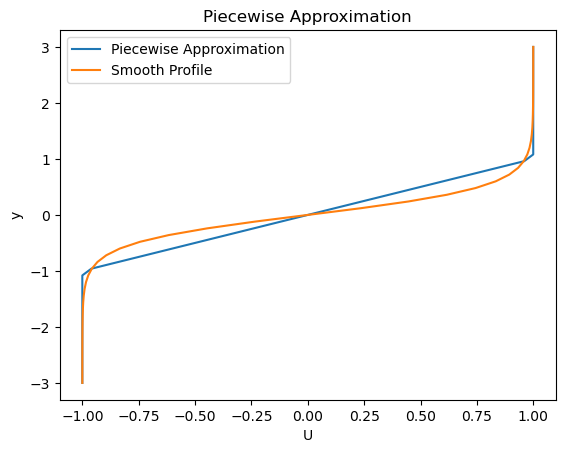

In [21]:
#define the piecewise function detailed above.
#there are many prebuilt piecewise creation functions, but this has been chosed since the model suggested is extremely simple and no extra packages are required
def U_pw(y):
    if y>=1: return 1
    elif y<-1: return -1
    else: return y

#store the values for U estimated by this piecewise function, for evenly spaced y values.
#The y values used are the same y values used for the smooth plot. This ensures correct errors are calculated
U_estimate=[]
for i in range(len(y)):
    U_estimate.append(U_pw(y[i]))

#Plot the estimate for the flow using the piecewise approximation
fig10=plt.figure(10)
plt.plot(U_estimate,y,label='Piecewise Approximation')
plt.title('Piecewise Approximation')
plt.xlabel('U')
plt.ylabel('y')
plt.plot(U,y,label='Smooth Profile')
plt.legend()
plt.show()

Close to y=+/-1 the piecewise graph sections are fused together. This is expected to be seen, since a finite number of grid spaces are joined together.

Errors for the piecewise approximation are calculated and shown.

C:\Users\jonah\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == "":


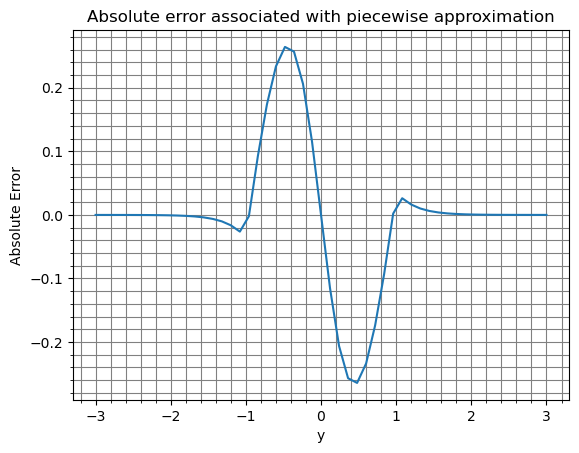

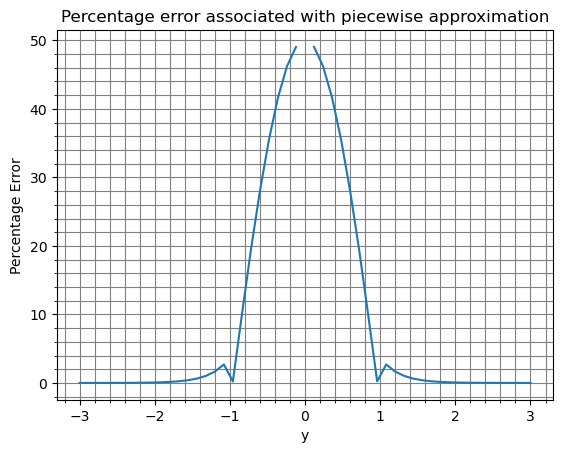

In [22]:
#create a woarning for if the number of data points for the real and estimates are unequal. This ishould not be the case.
if len(U)!=len(U_estimate): print('LENGTH ERROR')

#calculate the error for each estimation grid point, by comparing with the value calculated with the smooth profile.
abs_errors=[]
per_errors=[]
for i in range(len(U)):
    #absolute error formula
    abs_error=((U_estimate[i]-U[i]))
    abs_errors.append(abs_error)
    #percentage error formula
    per_error=abs(100*(U_estimate[i]-U[i])/U[i])
    per_errors.append(per_error)

fig11=plt.figure(11)
plt.plot(y,abs_errors)
plt.title('Absolute error associated with piecewise approximation')
plt.xlabel('y')
plt.ylabel('Absolute Error')
plt.grid(which='both',color='gray')
plt.minorticks_on()

fig12=plt.figure(12)
plt.plot(y,per_errors)
plt.title('Percentage error associated with piecewise approximation')
plt.xlabel('y')
plt.ylabel('Percentage Error')
plt.grid(which='both',color='gray')
plt.minorticks_on()
plt.show()

These errors are as expected when viewing the piecewise and smooth profiles together in figure 10. The percentage error is very high close to y=0, since the formula involves 1/very small number. The maximum absolute error is a better representation of the accuracy of the piecewise function. At it's worst, the piecewise function is only around 0.26 from the true value. 

In general this selection for the piecewise function is a good representation of the smooth funtion, with relatively small absolute errors. By increasing the number of interpolation points for the piecewise function, or by having non-linear functions between the points, the piecewise function would be a more accurate representation of the smooth profile. Increased complexity however would greatly increase computational stress, and in this case would likely only add a small benefit to the already good fit. This is the simplest the function can be while maintaining accuracy.

### 3b

Using the piecewise function defined in 3a, the maximum growth rate, corresponding wavelength, and the cut off wavelength are calculated, as in 2b.

In [23]:
#set parameters
n=49 
ntot=n+2
nwave=180 
a=0.5
domain_size=3
y1=-domain_size
y2=domain_size
stable=1
#again introduce a resolution multiplier to ensure an accurate value is read from the graph
res_multiplier=10

#set up empty arrays
Uyy=np.zeros(ntot)
dy=(y2-y1)/(ntot-1)
y=np.linspace(y1,y2,ntot)

#unlike 2b, set the values for U to be those estimated by the piecewise function
def U_pw(y):
    if y>=1: return 1
    elif y<-1: return -1
    else: return y

U_estimate=[]
for i in range(len(y)):
    U_estimate.append(U_pw(y[i]))

#repeat question 2b, but with the estimated U values

for j in np.arange(1,n+1):
    Uyy[j]=(U_estimate[j+1]-2.0*U_estimate[j]+U_estimate[j-1])/(dy**2)

savek=np.zeros(res_multiplier*(nwave+1))
max_growth=np.zeros(res_multiplier*(nwave+1))
#set up an empty list to store eigenvalues for each wavenumber 
evalues=[]

for iloop in np.arange(1,nwave+1,1/res_multiplier):
    
    k=(2.0**0.0625)**(iloop-160)
    
    D = np.zeros((n,n))

    for i in range(n):
        D[i,i]=-2.0/dy/dy-k**2
    for i in range(0, n-1):
        D[i,i+1]=1.0/dy/dy
        D[i+1,i]=1.0/dy/dy
    
    A=np.copy(D)
    for i in range(n):
        A[i,i]=D[i,i]*U_estimate[i+1]-Uyy[i+1]
    for i in range(0, n-1):
        A[i,i+1]*=U_estimate[i+1]
        A[i+1,i]*=U_estimate[i+2]
    
    vals, vects = eig(A, D)
    #add the eigenvalues for each wavenumber to the empty list
    evalues.append(vals)
    
    errors=[]
    for i in range(n):
        vv=vects[:,i]
        error=np.max(np.abs(A.dot(vv)-vals[i]*D.dot(vv)))
        errors.append(error)

    growth=[]
    for j in np.arange(0,len(vals)):
        c=vals[j];
        if np.imag(c) > 0.0:
            stable = 0
        growth.append(k*np.imag(c))
    
    max_growth[int(iloop*res_multiplier)]=np.max(np.abs(growth))
    savek[int(iloop*res_multiplier)]=k

if (stable):
    print('No unstable mode found')
else:
    print('Unstable')
    
print('The highest error in the eigenvalue problem is ',max(errors))

Unstable
The highest error in the eigenvalue problem is  1.5631940186722204e-13


The piecewise approximation also predicts an unstable flow with great accuracy, indicating high accuracy.

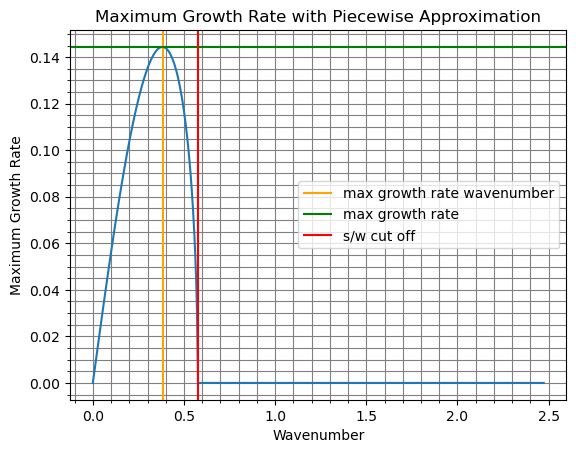

The maximum growth rate is approximately 0.14 with corresponding wavenumber k = 0.4
The short-wave cut off wavenumber is approximately k = 0.6


In [24]:
#define a list of max_growth values between the maximum and zeros to find the cut off wavelength
mingrowth=[]
for i in range (len(max_growth)):
    if (max_growth[i])!=0.0:
        mingrowth.append(max_growth[i])
mingrowth=mingrowth[np.argmax(mingrowth):]

fig13=plt.figure(13)
plt.plot(savek,max_growth)
plt.title('Maximum Growth Rate with Piecewise Approximation')
plt.xlabel('Wavenumber')
plt.ylabel('Maximum Growth Rate')
plt.grid(which='both',color='gray')
plt.minorticks_on()
plt.axvline(x=savek[np.argmax(max_growth)],color='orange',label='max growth rate wavenumber')
plt.axhline(y=max(max_growth),color='green',label='max growth rate')
plt.axvline(x=savek[(max_growth.tolist()).index(max(max_growth))+mingrowth.index(min(mingrowth))+1],
            color='red',label='s/w cut off')
plt.legend()
plt.show()

print('The maximum growth rate is approximately',round(max(max_growth),2),'with corresponding wavenumber k ='
      ,round(savek[np.argmax(max_growth)],1))
print('The short-wave cut off wavenumber is approximately k =',
      round(savek[(max_growth.tolist()).index(max(max_growth))+mingrowth.index(min(mingrowth))+1],1))

The maximum growth rate, corresponding wavelength, and the cut off wavelength are all significantly lower when the piecewise approximation is used than with the smooth function. This indicated the piecewise approximation predicts much greater stability of the flow. This could be due to the inherent innacuracy when using a simple approximation function.

Some of the eigenvalues corresponding to unstable flow for different wavelengths are presented. Flow is only unstable if Im(c)!=0, so only these eigenvalues are presented.

In [25]:
#Select some of the wavenumbers to present eigenvalues for.
#A small number of evenly spaced wavenumbers are presented
savek_trimmed=savek[10:1500:150]

#collate the eigenvalues for the selected wavenumbers
evalues_trimmed=[]
for i in range (0,len(savek_trimmed)):
    evalues_trimmed.append(evalues[savek.tolist().index(savek_trimmed[i])])

#select only the unstable eigenvalues, where Im(c)!=0
storec=[]
for i in range (len(evalues_trimmed)):
    c=evalues_trimmed[i]
    c_imag=np.imag(c)
    c=c[c_imag!=0]
    storec.append(c)

for i in range (0,len(savek_trimmed)):
    print('For k =',savek_trimmed[i],'Unstable eigenvalues c(k) =',storec[i])

For k = 0.0010197986156517847 Unstable eigenvalues c(k) = [6.70465346e-14+0.57732895j 6.70465346e-14-0.57732895j]
For k = 0.001953125000000023 Unstable eigenvalues c(k) = [-4.2068935e-14+0.57732429j -4.2068935e-14-0.57732429j]
For k = 0.0037406378152288473 Unstable eigenvalues c(k) = [2.20436375e-14+0.57730724j 2.20436375e-14-0.57730724j]
For k = 0.0071640940875365745 Unstable eigenvalues c(k) = [2.51606241e-14+0.57724467j 2.51606241e-14-0.57724467j]
For k = 0.013720720002916548 Unstable eigenvalues c(k) = [-2.85333901e-14+0.57701522j -2.85333901e-14-0.57701522j]
For k = 0.026278012976678842 Unstable eigenvalues c(k) = [2.81644712e-14+0.5761744j 2.81644712e-14-0.5761744j]
For k = 0.05032782287341467 Unstable eigenvalues c(k) = [-3.30851784e-14+0.57310067j -3.30851784e-14-0.57310067j]
For k = 0.09638817658799714 Unstable eigenvalues c(k) = [4.28403705e-14+0.56196104j 4.28403705e-14-0.56196104j]
For k = 0.18460326824243892 Unstable eigenvalues c(k) = [1.77401038e-14+0.5226718j 1.77401038

This piecewise model is extremely simple, with only two interpolation points, and linear functions connecting them. It is obvious that more points and non linear functions would imporve the accuracy of the model, but at the cost of increased comuting power for diminishing returns. 

## Q5a

For a varying density profile, the equations used to calculate the matrices are different, as Rayleigh's equation has been modified.

In [26]:
#set parameters
#need to reduce n to show instability
n=40
ntot=n+2
nwave=180
a=0.5
b=0.5
p1=1
p2x=4
domain_size=3
y1=-domain_size
y2=domain_size
stable=1
#decreasing the step size for k values helps to show accurately the cut off wavelength, while still showing the instability
res_multiplier=10

Uy=np.zeros(ntot)
Uyy=np.zeros(ntot)
Py=np.zeros(ntot)
dy=(y2-y1)/(ntot-1)
y=np.linspace(y1,y2,ntot)

#density profile is now changed
P=p1+p1*(p2x-p1)*(np.tanh(y/b)+1)/2
U=np.tanh(y/a)

for j in np.arange(1,n+1):
    #density is y dependent now, so the derivative at each grid point will be needed to solve the fluid equations
    Py[j]=(P[j+1]-P[j-1])/(2*dy)
    Uy[j]=(U[j+1]-U[j-1])/(2*dy)
    
for j in np.arange(1,n+1):
    Uyy[j]=(U[j+1]-2.0*U[j]+U[j-1])/(dy**2)
    

savek=np.zeros(res_multiplier*(nwave+1))
max_growth=np.zeros(res_multiplier*(nwave+1))

for iloop in np.arange(1,nwave+1,1/res_multiplier):
    
    k=(2.0**0.0625)**(iloop-160)
    
    #change to suit adjusted reighley equation
    D=np.zeros((n,n))
    #diagonals
    for i in range(n):
        D[i,i]=-2*P[i]/dy/dy-P[i]*k**2
    #off-diagonals
    for i in range(0, n-1):
        D[i,i+1]=P[i]/dy/dy+Py[i]/(2*dy)
        D[i+1,i]=P[i]/dy/dy-Py[i]/(2*dy)
    
    #change to suit adjusted reighley equation
    A=np.copy(D)
    for i in range(n):
        A[i,i]=D[i,i]*U[i+1]-Py[i+1]*Uy[i+1]-P[i+1]*Uyy[i+1]
    for i in range(0,n-1):
        A[i,i+1]*=U[i+1]
        A[i+1,i]*=U[i+2]
    vals, vects = eig(A, D)
    
    #Now repeat previous code to plot the growth rates
    
    errors=[]
    for i in range(n):
        vv=vects[:,i]
        error=np.max(np.abs(A.dot(vv)-vals[i]*D.dot(vv)))
        errors.append(error)

    growth=[]
    for j in np.arange(0,len(vals)):
        c=vals[j];
        if np.imag(c) > 0.0:
            stable = 0
        growth.append(k*np.imag(c))
    
    max_growth[int(iloop*res_multiplier)]=np.max(np.abs(growth))
    savek[int(iloop*res_multiplier)]=k

if (stable):
    print('No unstable mode found')
else:
    print('Unstable')
    
print('The highest error in the eigenvalue problem is ',max(errors))

Unstable
The highest error in the eigenvalue problem is  7.140954494389007e-13


With few enough grid points, the flow is found to be unstable for p2=4*p1

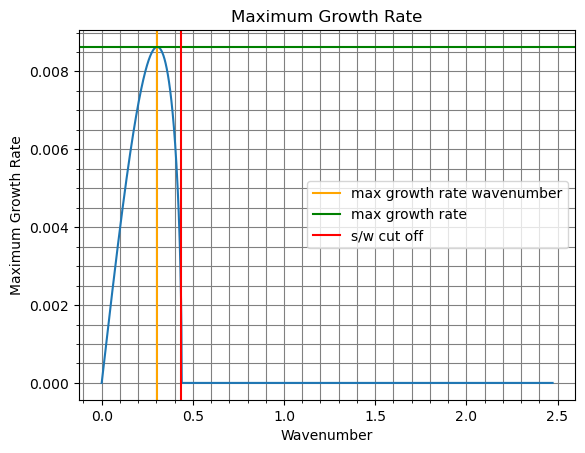

The maximum growth rate is approximately  0.009 with corresponding wavenumber k = 0.3
The short-wave cut off wavenumber is approximately k = 0.4


In [27]:
mingrowth=[]
for i in range (len(max_growth)):
    if (max_growth[i])!=0.0:
        mingrowth.append(max_growth[i])

fig14=plt.figure(14)
plt.plot(savek,max_growth)
plt.title('Maximum Growth Rate')
plt.xlabel('Wavenumber')
plt.ylabel('Maximum Growth Rate')
plt.grid(which='both',color='gray')
plt.minorticks_on()
plt.axvline(x=savek[np.argmax(max_growth)],color='orange',label='max growth rate wavenumber')
plt.axhline(y=max(max_growth),color='green',label='max growth rate')
plt.axvline(x=savek[mingrowth.index(min(mingrowth[np.argmax(max_growth):]))+res_multiplier],color='red',label='s/w cut off')
plt.legend()
plt.show()

print('The maximum growth rate is approximately ',round(max(max_growth),3),'with corresponding wavenumber k ='
      ,round(savek[np.argmax(max_growth)],1))
print('The short-wave cut off wavenumber is approximately k =',
      round(savek[mingrowth.index(min(mingrowth[np.argmax(max_growth):]))+res_multiplier],1))

### 5b

To see how these change with different density jumps, a loop over the density is made.

In [28]:
n=40
ntot=n+2
nwave=180
a=0.5
b=0.5
p1=1
#set the highest density multiplier to loop to
density_max=6
domain_size=3
y1=-domain_size
y2=domain_size
res_multiplier=6

Uy=np.zeros(ntot)
Uyy=np.zeros(ntot)
Py=np.zeros(ntot)
Uyy = np.zeros(ntot)
max_max_growth=np.zeros(res_multiplier*density_max)
max_max_k=np.zeros(res_multiplier*density_max)

dy=(y2-y1)/(ntot-1)
y=np.linspace(y1,y2,ntot)
U=np.tanh(y/a)

#Loop over density jumps
for density in np.arange(1,density_max,1/res_multiplier):
    stable=1
    P=p1+p1*(density-1)*(np.tanh(y/b)+1)/2
    
    #The rest of this is essentially repeating previous code
    
    for j in np.arange(1,n+1):
        Py[j]=(P[j+1]-P[j-1])/(2*dy)
        Uy[j]=(U[j+1]-U[j-1])/(2*dy)

    for j in np.arange(1,n+1):
        Uyy[j]=(U[j+1]-2.0*U[j]+U[j-1])/(dy**2)

    savek=np.zeros(res_multiplier*(nwave+1))
    max_growth=np.zeros(res_multiplier*(nwave+1))
    
    #loop over all wavenumbers
    for iloop in np.arange(1,nwave+1,1/res_multiplier):

        k=(2.0**0.0625)**(iloop-160)

        D=np.zeros((n,n))
        for i in range(n):
            D[i,i]=-2*P[i]/dy/dy-P[i]*k**2
        for i in range(0, n-1):
            D[i,i+1]=P[i]/dy/dy+Py[i]/(2*dy)
            D[i+1,i]=P[i]/dy/dy-Py[i]/(2*dy)

        A=np.copy(D)
        for i in range(n):
            A[i,i]=D[i,i]*U[i+1]-Py[i+1]*Uy[i+1]-P[i+1]*Uyy[i+1]
        for i in range(0,n-1):
            A[i,i+1]*=U[i+1]
            A[i+1,i]*=U[i+2]
        vals, vects = eig(A, D)

        errors=[]
        for i in range(n):
            vv = vects[:,i]
            error = np.max(np.abs(A.dot(vv)-vals[i]*D.dot(vv)))
            errors.append(error)

        growth=[]
        for j in np.arange(0,len(vals)):
            c = vals[j];
            if np.imag(c) > 0.0:
                stable = 0
            growth.append(k*np.imag(c))
        max_growth[int(iloop)]=np.max(np.abs(growth))
        savek[int(iloop)]=k
    
    max_max_growth[int(density*res_multiplier)]=max(max_growth)
    max_max_k[int(density*res_multiplier)]=savek[np.argmax(max_growth)]

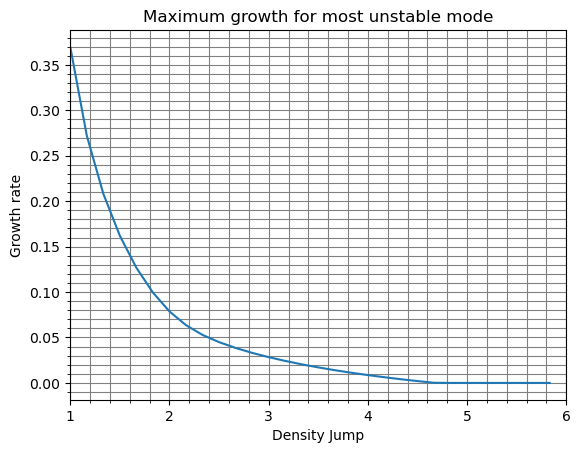

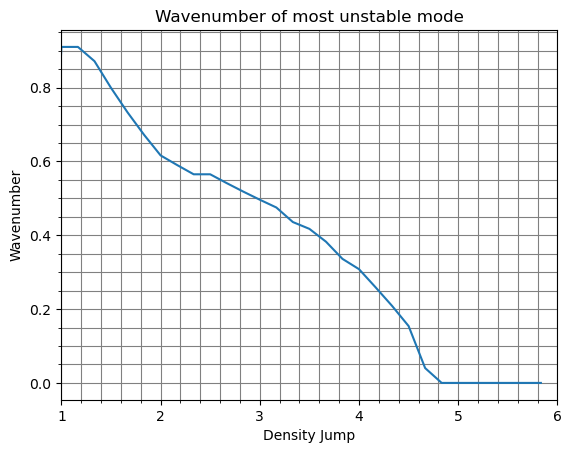

In [29]:
fig15=plt.figure(15)
plt.plot(np.arange(0,res_multiplier*density)/res_multiplier,max_max_growth[:])
plt.title('Maximum growth for most unstable mode')
plt.xlabel('Density Jump')
plt.ylabel('Growth rate')
plt.grid(which='both',color='gray')
plt.minorticks_on()
plt.xlim(1,density_max)
plt.show()

fig16=plt.figure(16)
plt.plot(np.arange(0,res_multiplier*density)/res_multiplier,max_max_k[:])
plt.title('Wavenumber of most unstable mode')
plt.xlabel('Density Jump')
plt.ylabel('Wavenumber')
plt.grid(which='both',color='gray')
plt.minorticks_on()
plt.xlim(1,density_max)
plt.show()